# Pearson's $\chi^2$ Test: Right-Tailed Test

### Let's answer the question: Is the distribution of rolls we get consistent with a fair die? Or, does the observed distribution deviate from the expected distribution of a fair die?

This question not only examines the outcome of rolling a single number (e.g., one or six) but compare the discrete distribution of all possible rolls to that of a fair die.

The Pearson's $\chi^2$ test for rolling a die gives:

$$ \chi^2 = \sum_{i=1}^{6} \frac{(C_i - E_i)^2}{E_i} $$

where, 

$\chi^2$ = chi-squared test statistics

C = the number of count or observation of a number of type i (e.g., one)

E = expected count of type i


Here, we convert 𝜒2 value to a probability given the  𝜒2 distribution, with 5 degree of freedom (df). The 'df' here represents the number of categorical variables we are dealing with minus 1 (i.e., df = 6 categories or sides - 1 = 5).

## Importing Libraries and Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('loaded_500.txt')

In [2]:
data.size

500

## Visualising Data

Plotting histogram for each outcome

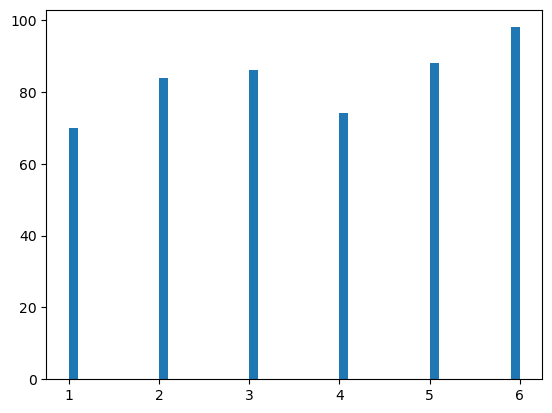

In [3]:
unique, counts = np.unique(data, return_counts=True)
plt.hist(data, bins=50);

## Posing Hypothesis

- Null hypothesis (H0): The observed distribution does not deviate from the expected distribution of a fair die. Or, the die is fair.
- Alternative hypothesis (Ha): The observed distribution deviates from the expected distribution of a fair die. Or, the die is not fair.

## Computing $\chi^2$ Test Statistic

In [4]:
expected = data.size / 6
chi2_val = np.sum((counts - expected)**2 / expected)
print(chi2_val)

6.112


## Visualising Distribution and Calculating P-Value

Our p-value is 0.295


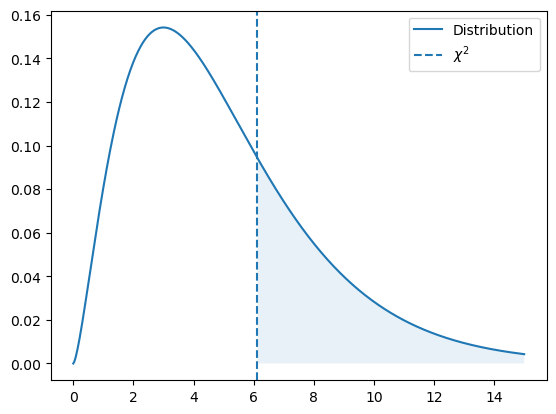

In [5]:
from scipy.stats import chi2
chi2s = np.linspace(0, 15, 500)
prob = chi2.pdf(chi2s, 5)

plt.plot(chi2s, prob, label= 'Distribution')
plt.axvline(chi2_val, ls='--', label='$\chi^2$')
plt.fill_between(chi2s, prob, 0, where=(chi2s>=chi2_val), alpha=0.1)
plt.legend();
print(f"Our p-value is {chi2.sf(chi2_val, 5):.3f}") 
# Or, we can also use "1 - chi2.cdf(chi2_val, 5)" function to calculate p-value.

**Another way of computing 𝜒2 test statistic and p-value**

In [6]:
from scipy.stats import chisquare
chisq, p = chisquare(counts, expected)
print(f"We have a chi2 of {chisq:.2f} with a p-value of {p:.3f}")

We have a chi2 of 6.11 with a p-value of 0.295


Here, as the p-value is greater than 0.05 (the level of significance), we conclude that our null hypothesis holds true. Therefore, the observed distribution does not deviate from the expected distribution of a fair die. Or the die is fair.

### Calculating Chi-Square Critical Value **(Optional)**

We use **scipy.stats.chi2.ppf(1-q, df)** method to calculate critical value, where ppf = Percent Point Function, q = significance level and df = degrees of freedom.

In [7]:
from scipy.stats import chi2
crit_value = chi2.ppf(0.95, 5) # Given the chi-square distribution is always a one-sided (right-tailed) test, we use a 5% significance level (i.e., α level) or a 95% confidence level to calculate the chi-square critical value.
print(crit_value)

11.070497693516351
